In [1]:
import numpy as np
from sklearn.datasets import fetch_openml

In [2]:
np.random.seed(42)
mnist = fetch_openml('mnist_784', version=1)

In [3]:
Y = mnist.target.astype(int)

In [5]:
x_train = mnist.data.iloc[:49_000]
x_test = mnist.data.iloc[49_000:]

y_train = Y.iloc[:49_000]
y_test = Y.iloc[49_000:]

In [13]:
x_train_69 = np.r_[x_train[y_train == 6].values, x_train[y_train == 9].values]
y_train_69 = np.r_[y_train[y_train == 6].values, y_train[y_train == 9].values]
y_train_69[y_train_69 == 6] = 1
y_train_69[y_train_69 == 9] = 0

from sklearn.utils import shuffle

x_train_69, y_train_69 = shuffle(x_train_69, y_train_69, random_state=1729)

In [7]:
# Train the LogisticRegression model using SGDClassifier() with the following common settings.
# No Regularization
# random_state : 10
# Iteration : 30
# Capture the loss for each iteration and plot the iteration vs loss curve. For which of the following settings, the iteration vs loss curve converged quickly to zero loss?

# A. Set Learning rate : 0.01 and plot the curve and fit the model with `x_train_69`
# B. Set learning rate to 0.000001 and fit the model with `x_train_69 `.
# C. Keep the learning rate as 0.01. Scale the samples using StandardScaler() and fit the model with the pre-processed samples.
# D. Use the "invscaling" stratagey for the learning rate with power_t = 1. Fit the model with x_train_69 (without pre-procesing).

from sklearn.linear_model import SGDClassifier

In [16]:
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

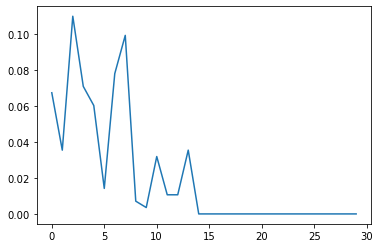

In [18]:
# A
clf = SGDClassifier(
    loss='log', learning_rate='constant', alpha=0, random_state=10,
    # Change below this
    eta0=0.01
)
losses = []
for i in range(30):
    clf.partial_fit(x_train_69, y_train_69, classes=[0, 1])
    losses.append(log_loss(y_train_69, clf.predict_proba(x_train_69)))
plt.plot(losses)

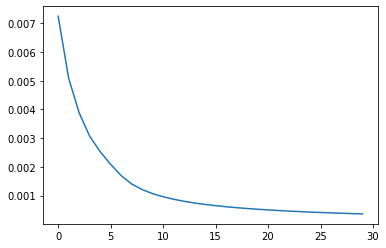

In [19]:
# B: Set learning rate to 0.000001 and fit the model with `x_train_69 `.

clf = SGDClassifier(
    loss='log', learning_rate='constant', alpha=0, random_state=10,
    # Change below this
    eta0=0.000001
)
losses = []
for i in range(30):
    clf.partial_fit(x_train_69, y_train_69, classes=[0, 1])
    losses.append(log_loss(y_train_69, clf.predict_proba(x_train_69)))
plt.plot(losses)

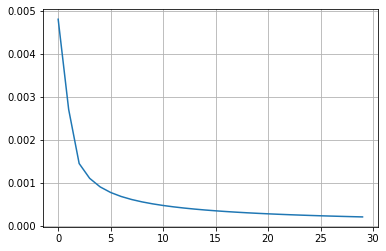

In [21]:
# C. Keep the learning rate as 0.01. Scale the samples using StandardScaler() and fit the model with the pre-processed samples.
from sklearn.preprocessing import StandardScaler
clf = SGDClassifier(
    loss='log', learning_rate='constant', alpha=0, random_state=10,
    # Change below this
    eta0=0.01
)

x_train_69tr = StandardScaler().fit_transform(x_train_69)
losses = []
for i in range(30):
    clf.partial_fit(x_train_69tr, y_train_69, classes=[0, 1])
    losses.append(log_loss(y_train_69, clf.predict_proba(x_train_69tr)))
plt.plot(losses)
plt.grid()

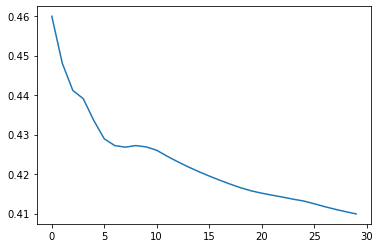

In [23]:
# D. Use the "invscaling" stratagey for the learning rate with power_t = 1. Fit the model with x_train_69 (without pre-procesing).

clf = SGDClassifier(
    loss='log', learning_rate='invscaling', alpha=0, random_state=10, eta0=0.01,
    # Change below this
    power_t=1
)
losses = []
for i in range(30):
    clf.partial_fit(x_train_69, y_train_69, classes=[0, 1])
    losses.append(log_loss(y_train_69, clf.predict_proba(x_train_69)))
plt.plot(losses)

/home/jaidevd/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


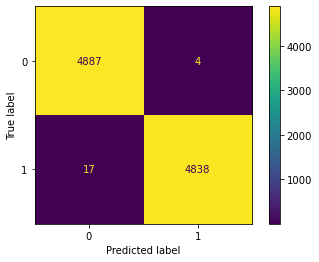

In [27]:
# 3)
# eta0 = 0.5
# learning_rate = 'inv_scaling'
# power_t = 0.5
# iterations = 10
# Shuffle = True
# random_state = 10

clf = SGDClassifier(loss='log', learning_rate='invscaling', eta0=0.5, power_t=0.5, shuffle=True, random_state=10)
for i in range(10):
    clf.partial_fit(x_train_69, y_train_69, classes=[0, 1])
# pred = clf.predict(x_train_69)
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, x_train_69, y_train_69)

In [28]:
y_pred = clf.predict(x_train_69)

In [29]:
np.where([True, False, True])

(array([0, 2]),)

In [32]:
np.where(np.logical_and(y_pred == 1, y_train_69 == 0))[0].min()

2167

In [33]:
from sklearn.datasets import fetch_20newsgroups

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
news = fetch_20newsgroups()

In [36]:
X = TfidfVectorizer().fit_transform(news.data)

In [37]:
X.shape

(11314, 130107)

In [47]:
from sklearn.model_selection import train_test_split
xtr, xts, ytr, yts = train_test_split(X, news.target, test_size=0.3, random_state=0, stratify=news.target)

In [39]:
xx = fetch_20newsgroups(subset='train')
TfidfVectorizer().fit_transform(xx.data)

(11314, 130107)

In [40]:
from sklearn.naive_bayes import MultinomialNB

In [48]:
mnb = MultinomialNB()
mnb.fit(xtr, ytr)

MultinomialNB()

In [49]:
mnb.score(xts, yts)

0.8326951399116348